# Chapter 02 2차원 벡터로 그림 그리기

## 2.1.2 2차원 벡터 그리기

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

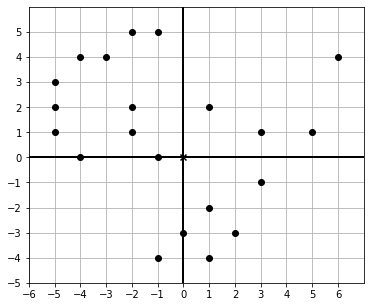

In [8]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2),(-2,2), (-5,1),
                    (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]
draw(Points(*dino_vectors))

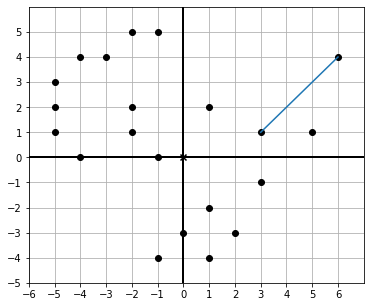

In [4]:
draw(Points(*dino_vectors),Segment((6,4),(3,1)))

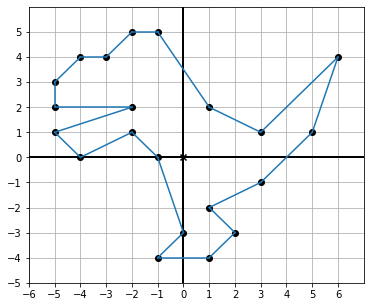

In [9]:
draw(Points(*dino_vectors),Polygon(*dino_vectors))

## 2.1.3 연습문제

### 연습문제 2.1
#### 공룡의 발끝에 해당하는 점의 x좌표와 y좌표를 구하라.

In [10]:
(-1,-4)

(-1, -4)

### 연습문제 2.2
#### 평면에 점 (2,-2)와 해당 점에 대응하는 화살표를 그려라.

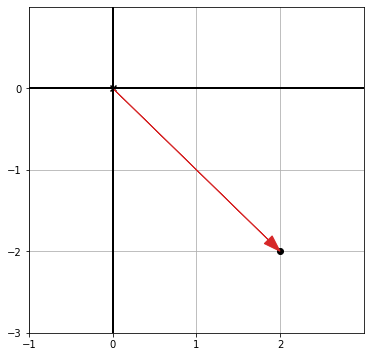

In [19]:
draw(Points((2,-2)),Arrow((2,-2)))

### 연습문제 2.3
#### 공룡의 외양을 나타내는 벡터를 나타내라

In [16]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2),(-2,2), (-5,1),
                    (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

### 연습문제 2.4
#### dino_vectors를 꼭짓점으로 해서 Polygon 객체를 생성하고 점들을 연결해서 공룡을 그려라.

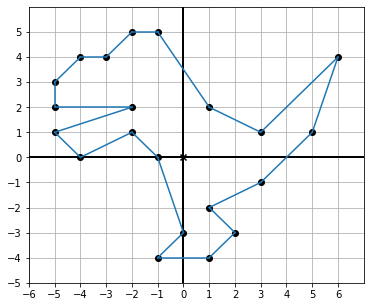

In [17]:
draw(Points(*dino_vectors),Polygon(*dino_vectors))

### 연습문제 2.5
#### draw 함수를 사용해 x=-10 이상 x=11 미만의 범위의 정수 x에 대해 벡터 (x,x**2)가 나타내는 점을 그려라.

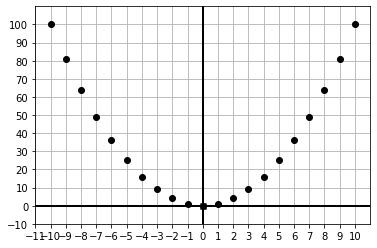

In [22]:
draw(
    Points(*[(x,x**2) for x in range (-10,11)]),
    grid = (1,10),
    nice_aspect_ratio = False)